In [35]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import xgboost as xgb
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler

df_infrared = pd.read_csv('https://github.com/KhalPrawira/Machine-Learning-Course/raw/refs/heads/main/07.%20Week%207/Dataset/Infrared.csv')
df_automobile = pd.read_csv('https://github.com/KhalPrawira/Machine-Learning-Course/raw/refs/heads/main/07.%20Week%207/Dataset/Automobile.csv')
df_boston = pd.read_csv('https://github.com/KhalPrawira/Machine-Learning-Course/raw/refs/heads/main/07.%20Week%207/Dataset/BostonHousing.csv')

print("Infrared Dataset")
display(df_infrared.head())
print("Automobile Dataset")
display(df_automobile.head())
print("Boston Housing Dataset")
display(df_boston.head())

Infrared Dataset


,Gender,Age,Ethnicity,T_atm,Humidity,Distance,T_offset1,Max1R13_1,Max1L13_1,aveAllR13_1,...,T_FHRC1,T_FHLC1,T_FHBC1,T_FHTC1,T_FH_Max1,T_FHC_Max1,T_Max1,T_OR1,T_OR_Max1,aveOralM
0,Male,41-50,White,24.0,28.0,0.8,0.7025,35.0300,35.3775,34.4000,...,33.4775,33.3725,33.4925,33.0025,34.5300,34.0075,35.6925,35.6350,35.6525,36.59
1,Female,31-40,Black or African-American,24.0,26.0,0.8,0.7800,34.5500,34.5200,33.9300,...,34.0550,33.6775,33.9700,34.0025,34.6825,34.6600,35.1750,35.0925,35.1075,37.19
2,Female,21-30,White,24.0,26.0,0.8,0.8625,35.6525,35.5175,34.2775,...,34.8275,34.6475,34.8200,34.6700,35.3450,35.2225,35.9125,35.8600,35.8850,37.34
3,Female,21-30,Black or African-American,24.0,27.0,0.8,0.9300,35.2225,35.6125,34.3850,...,34.4225,34.6550,34.3025,34.9175,35.6025,35.3150,35.7200,34.9650,34.9825,37.09
4,Male,18-20,White,24.0,27.0,0.8,0.8950,35.5450,35.6650,34.9100,...,35.1600,34.3975,34.6700,33.8275,35.4175,35.3725,35.8950,35.5875,35.6175,37.04


Automobile Dataset


,price,highway-mpg,city-mpg,peak-rpm,horsepower,compression-ratio,stroke,bore,fuel-system,engine-size,...,wheel-base,engine-location,drive-wheels,body-style,num-of-doors,aspiration,fuel-type,make,normalized-losses,symboling
0,13495.0,27,21,5000.0,111.0,9.0,2.68,3.47,mpfi,130,...,88.6,front,rwd,convertible,2.0,std,gas,alfa-romero,NaN,3
1,16500.0,27,21,5000.0,111.0,9.0,2.68,3.47,mpfi,130,...,88.6,front,rwd,convertible,2.0,std,gas,alfa-romero,NaN,3
2,16500.0,26,19,5000.0,154.0,9.0,3.47,2.68,mpfi,152,...,94.5,front,rwd,hatchback,2.0,std,gas,alfa-romero,NaN,1
3,13950.0,30,24,5500.0,102.0,10.0,3.40,3.19,mpfi,109,...,99.8,front,fwd,sedan,4.0,std,gas,audi,164.0,2
4,17450.0,22,18,5500.0,115.0,8.0,3.40,3.19,mpfi,136,...,99.4,front,4wd,sedan,4.0,std,gas,audi,164.0,2


Boston Housing Dataset


,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


Infrared Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1020 entries, 0 to 1019
Data columns (total 34 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Gender       1020 non-null   object 
 1   Age          1020 non-null   object 
 2   Ethnicity    1020 non-null   object 
 3   T_atm        1020 non-null   float64
 4   Humidity     1020 non-null   float64
 5   Distance     1018 non-null   float64
 6   T_offset1    1020 non-null   float64
 7   Max1R13_1    1020 non-null   float64
 8   Max1L13_1    1020 non-null   float64
 9   aveAllR13_1  1020 non-null   float64
 10  aveAllL13_1  1020 non-null   float64
 11  T_RC1        1020 non-null   float64
 12  T_RC_Dry1    1020 non-null   float64
 13  T_RC_Wet1    1020 non-null   float64
 14  T_RC_Max1    1020 non-null   float64
 15  T_LC1        1020 non-null   float64
 16  T_LC_Dry1    1020 non-null   float64
 17  T_LC_Wet1    1020 non-null   float64
 18  T_LC_Max1    1020 non-nul

None

,T_atm,Humidity,Distance,T_offset1,Max1R13_1,Max1L13_1,aveAllR13_1,aveAllL13_1,T_RC1,T_RC_Dry1,...,T_FHRC1,T_FHLC1,T_FHBC1,T_FHTC1,T_FH_Max1,T_FHC_Max1,T_Max1,T_OR1,T_OR_Max1,aveOralM
count,1020.000000,1020.000000,1018.000000,1020.000000,1020.000000,1020.000000,1020.000000,1020.000000,1020.000000,1020.000000,...,1020.000000,1020.000000,1020.000000,1020.000000,1020.000000,1020.000000,1020.000000,1020.000000,1020.000000,1020.000000
mean,24.115392,28.723039,0.729784,0.968648,35.596533,35.611474,34.888475,35.011345,35.659921,35.587143,...,34.567782,34.565340,34.487701,34.577293,35.421555,35.094144,36.084785,35.805519,35.838277,37.028382
std,1.336338,13.071627,2.456486,0.362587,0.574888,0.549760,0.718613,0.633836,0.553897,0.569278,...,0.669410,0.678663,0.668065,0.728678,0.523477,0.576045,0.491821,0.559258,0.559316,0.509502
min,20.200000,9.900000,0.540000,-0.590000,33.897500,34.122500,31.770000,32.902500,33.985000,33.825000,...,31.452500,31.657500,31.280000,31.150000,33.407500,32.440000,34.892500,33.802500,33.835000,35.540000
25%,23.400000,17.600000,0.600000,0.772500,35.247500,35.271875,34.456250,34.651250,35.332500,35.249375,...,34.180000,34.177500,34.096875,34.225000,35.116875,34.756458,35.775000,35.474375,35.500000,36.777500
50%,24.000000,26.300000,0.620000,0.940000,35.548750,35.575000,34.915000,34.997500,35.602500,35.533750,...,34.597500,34.602500,34.512917,34.622500,35.391250,35.100000,36.027500,35.790000,35.825000,36.940000
75%,24.700000,36.200000,0.700000,1.140000,35.872500,35.883125,35.300000,35.363125,35.910625,35.855625,...,34.968125,34.965000,34.878125,35.012500,35.675000,35.415000,36.280000,36.087500,36.120625,37.140000
max,29.100000,61.200000,79.000000,2.875000,38.405000,38.042500,37.575000,37.680000,38.385000,38.380000,...,37.075000,37.165000,37.212500,37.367500,38.002500,37.632500,38.807500,38.417500,38.455000,40.340000


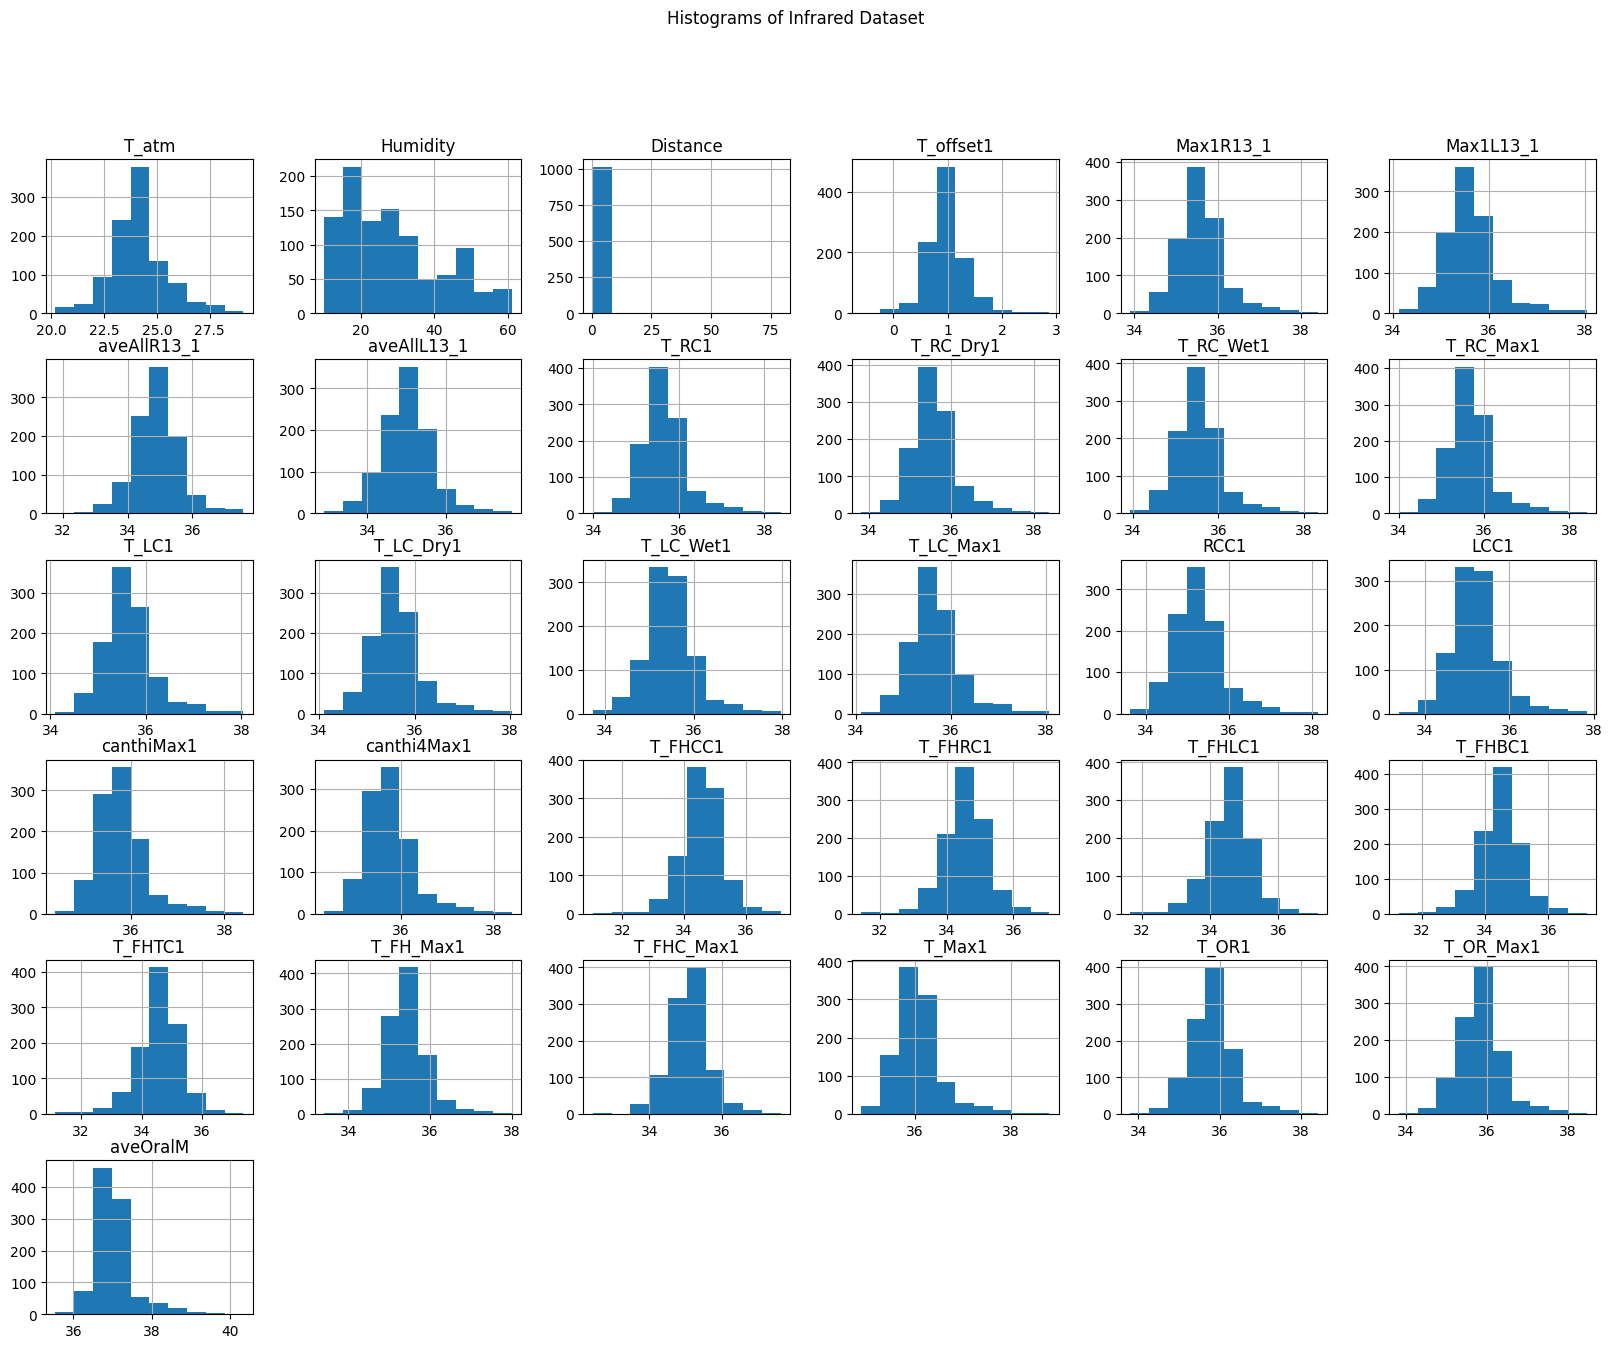


Automobile Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   price              201 non-null    float64
 1   highway-mpg        205 non-null    int64  
 2   city-mpg           205 non-null    int64  
 3   peak-rpm           203 non-null    float64
 4   horsepower         203 non-null    float64
 5   compression-ratio  205 non-null    float64
 6   stroke             201 non-null    float64
 7   bore               201 non-null    float64
 8   fuel-system        205 non-null    object 
 9   engine-size        205 non-null    int64  
 10  num-of-cylinders   205 non-null    int64  
 11  engine-type        205 non-null    object 
 12  curb-weight        205 non-null    int64  
 13  height             205 non-null    float64
 14  width              205 non-null    float64
 15  length             205 non-null    float64
 16  

None

,price,highway-mpg,city-mpg,peak-rpm,horsepower,compression-ratio,stroke,bore,engine-size,num-of-cylinders,curb-weight,height,width,length,wheel-base,num-of-doors,normalized-losses,symboling
count,201.000000,205.000000,205.000000,203.000000,203.000000,205.000000,201.000000,201.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,203.000000,164.000000,205.000000
mean,13207.129353,30.751220,25.219512,5125.369458,104.256158,10.142537,3.255423,3.329751,126.907317,4.380488,2555.565854,53.724878,65.907805,174.049268,98.756585,3.123153,122.000000,0.834146
std,7947.066342,6.886443,6.542142,479.334560,39.714369,3.972040,0.316717,0.273539,41.642693,1.080854,520.680204,2.443522,2.145204,12.337289,6.021776,0.994841,35.442168,1.245307
min,5118.000000,16.000000,13.000000,4150.000000,48.000000,7.000000,2.070000,2.540000,61.000000,2.000000,1488.000000,47.800000,60.300000,141.100000,86.600000,2.000000,65.000000,-2.000000
25%,7775.000000,25.000000,19.000000,4800.000000,70.000000,8.600000,3.110000,3.150000,97.000000,4.000000,2145.000000,52.000000,64.100000,166.300000,94.500000,2.000000,94.000000,0.000000
50%,10295.000000,30.000000,24.000000,5200.000000,95.000000,9.000000,3.290000,3.310000,120.000000,4.000000,2414.000000,54.100000,65.500000,173.200000,97.000000,4.000000,115.000000,1.000000
75%,16500.000000,34.000000,30.000000,5500.000000,116.000000,9.400000,3.410000,3.590000,141.000000,4.000000,2935.000000,55.500000,66.900000,183.100000,102.400000,4.000000,150.000000,2.000000
max,45400.000000,54.000000,49.000000,6600.000000,288.000000,23.000000,4.170000,3.940000,326.000000,12.000000,4066.000000,59.800000,72.300000,208.100000,120.900000,4.000000,256.000000,3.000000


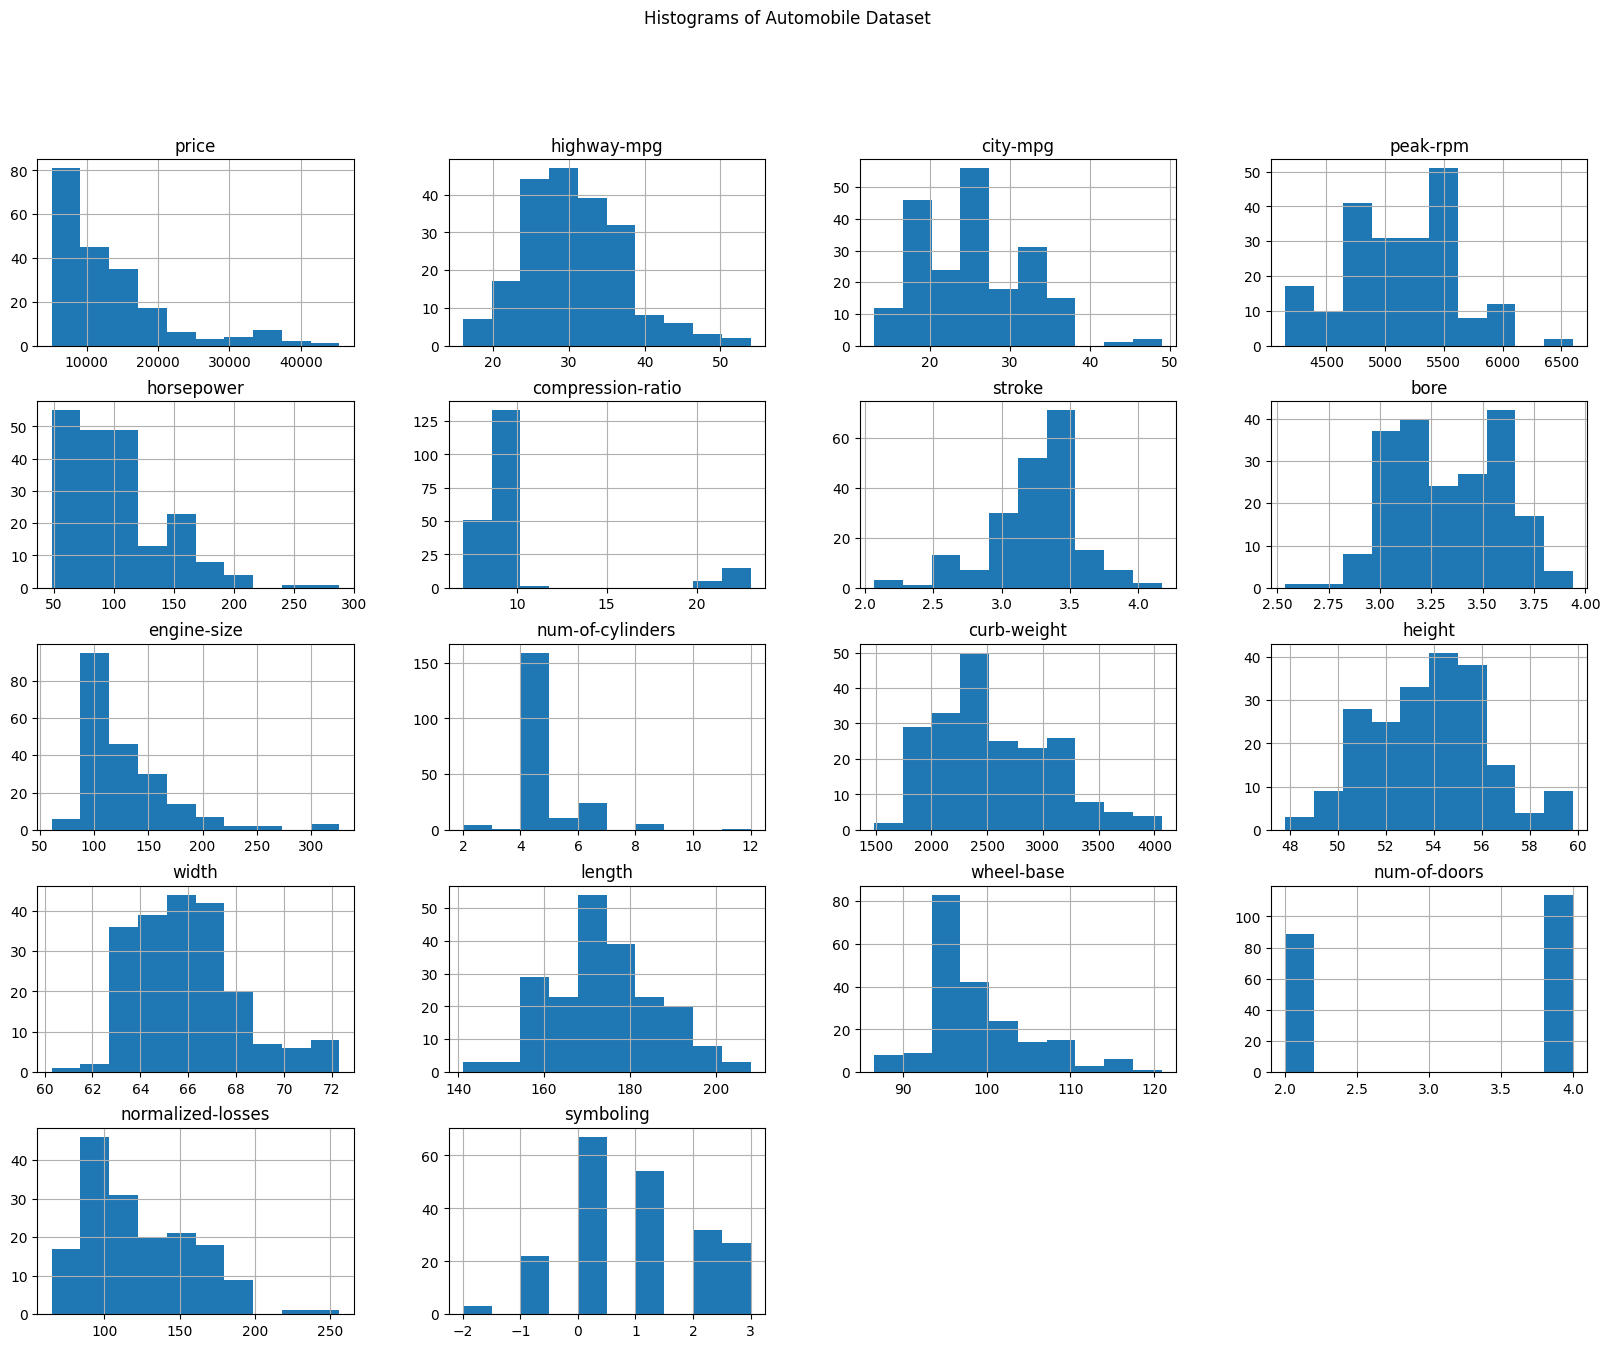


Boston Housing Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64
 2   indus    506 non-null    float64
 3   chas     506 non-null    int64  
 4   nox      506 non-null    float64
 5   rm       506 non-null    float64
 6   age      506 non-null    float64
 7   dis      506 non-null    float64
 8   rad      506 non-null    int64  
 9   tax      506 non-null    int64  
 10  ptratio  506 non-null    float64
 11  b        506 non-null    float64
 12  lstat    506 non-null    float64
 13  medv     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


None

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


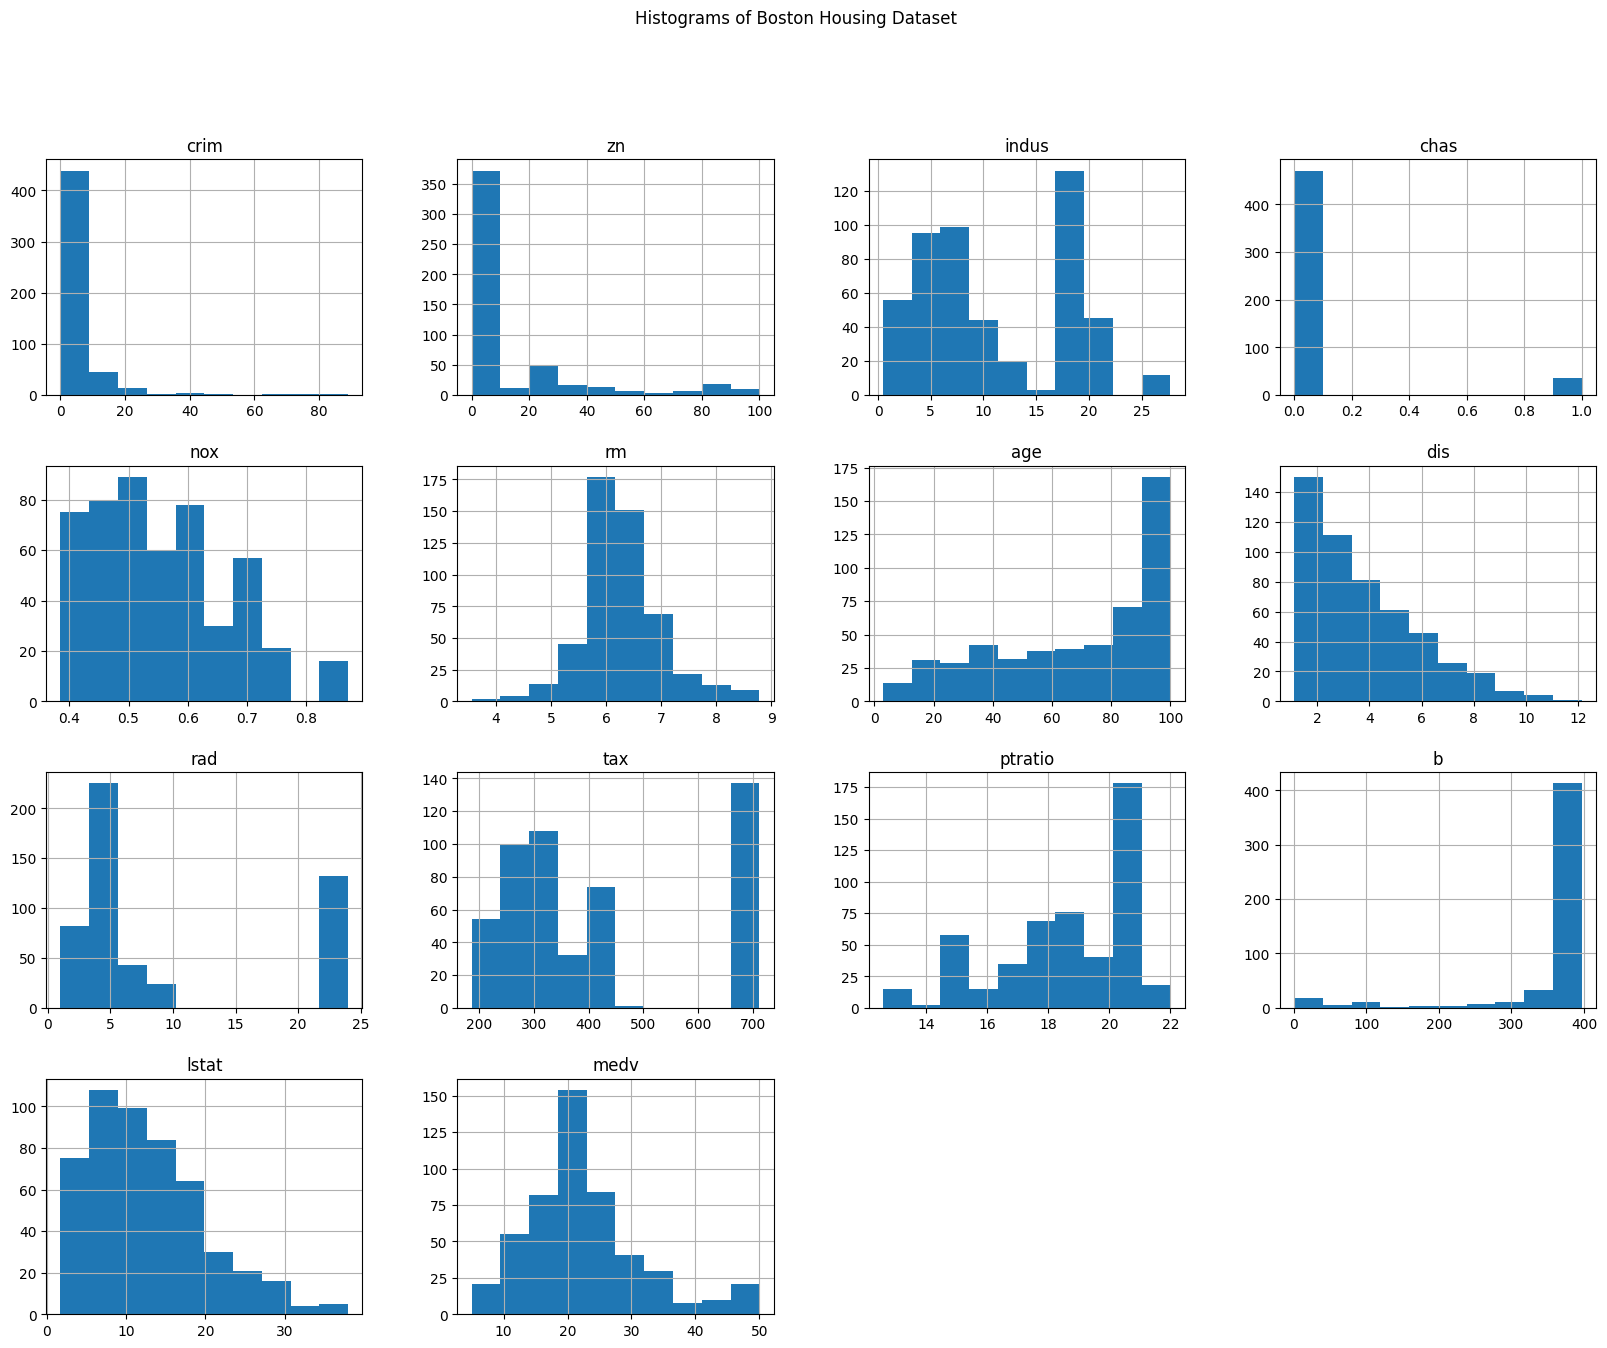

In [36]:
print("Infrared Dataset Info:")
display(df_infrared.info())
display(df_infrared.describe())

df_infrared.hist(figsize=(20, 15))
plt.suptitle("Histograms of Infrared Dataset")
plt.show()

print("\nAutomobile Dataset Info:")
display(df_automobile.info())
display(df_automobile.describe())

# Change visualization for automobile dataset
df_automobile.hist(figsize=(20, 15)) # Changed from boxplot to hist
plt.suptitle("Histograms of Automobile Dataset") # Updated title
plt.show()

print("\nBoston Housing Dataset Info:")
display(df_boston.info())
display(df_boston.describe())

df_boston.hist(figsize=(20, 15))
plt.suptitle("Histograms of Boston Housing Dataset")
plt.show()

In [37]:
df_infrared['Distance'] = df_infrared['Distance'].fillna(df_infrared['Distance'].median())

df_automobile.dropna(subset=['price'], inplace=True)

for col in ['peak-rpm', 'horsepower', 'stroke', 'bore']:
    df_automobile[col] = df_automobile[col].fillna(df_automobile[col].median())

df_automobile['normalized-losses'] = df_automobile['normalized-losses'].fillna(df_automobile['normalized-losses'].median())

for col in ['price', 'peak-rpm', 'horsepower', 'stroke', 'bore', 'normalized-losses', 'num-of-doors']:
    df_automobile[col] = pd.to_numeric(df_automobile[col], errors='coerce')

Q1_lstat = df_boston['lstat'].quantile(0.25)
Q3_lstat = df_boston['lstat'].quantile(0.75)
IQR_lstat = Q3_lstat - Q1_lstat
lower_bound_lstat = Q1_lstat - 1.5 * IQR_lstat
upper_bound_lstat = Q3_lstat + 1.5 * IQR_lstat
df_boston = df_boston[
    (df_boston['lstat'] >= lower_bound_lstat) & (df_boston['lstat'] <= upper_bound_lstat)
]

df_infrared = df_infrared.drop_duplicates()
df_automobile = df_automobile.drop_duplicates()
df_boston = df_boston.drop_duplicates()

def convert_age_to_numeric(df):
    age_mapping = {'21-30': 25.5, '31-40': 35.5, '41-50': 45.5, '51-60': 55.5, '61-70': 65.5, '71-80': 75.5, '81-90': 85.5}
    df['Age'] = df['Age'].map(age_mapping).astype(float)
    return df

df_infrared = convert_age_to_numeric(df_infrared)

df_infrared['T_atm_x_Age'] = df_infrared['T_atm'] * df_infrared['Age']
df_infrared['T_offset1_x_Distance'] = df_infrared['T_offset1'] * df_infrared['Distance']
df_infrared['T_atm_squared'] = df_infrared['T_atm']**2

df_automobile['fuel_efficiency'] = (df_automobile['highway-mpg'] + df_automobile['city-mpg']) / 2
df_automobile = pd.get_dummies(df_automobile, columns=['fuel-system', 'num-of-cylinders', 'engine-type', 'engine-location', 'drive-wheels', 'body-style', 'aspiration', 'fuel-type', 'make'], drop_first=True)

for col in ['price', 'peak-rpm', 'horsepower', 'stroke', 'bore', 'normalized-losses']:
    df_automobile[col] = pd.to_numeric(df_automobile[col], errors='coerce')

df_boston['rm_x_lstat'] = df_boston['rm'] * df_boston['lstat']
df_boston['nox_x_dis'] = df_boston['nox'] * df_boston['dis']
df_boston['lstat_squared'] = df_boston['lstat']**2

def scale_data(df, target_column):
    X = df.drop(target_column, axis=1)
    y = df[target_column]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    numerical_cols = X_train.select_dtypes(include=np.number).columns
    scaler = StandardScaler()
    X_train[numerical_cols] = scaler.fit_transform(X_train[numerical_cols])
    X_test[numerical_cols] = scaler.transform(X_test[numerical_cols])
    return X_train, X_test, y_train, y_test

X_train_infrared, X_test_infrared, y_train_infrared, y_test_infrared = scale_data(df_infrared, 'aveOralM')
X_train_automobile, X_test_automobile, y_train_automobile, y_test_automobile = scale_data(df_automobile, 'price')
X_train_boston, X_test_boston, y_train_boston, y_test_boston = scale_data(df_boston, 'medv')

display(X_train_infrared.head())
display(X_train_automobile.head())
display(X_train_boston.head())

,Gender,Age,Ethnicity,T_atm,Humidity,Distance,T_offset1,Max1R13_1,Max1L13_1,aveAllR13_1,...,T_FHBC1,T_FHTC1,T_FH_Max1,T_FHC_Max1,T_Max1,T_OR1,T_OR_Max1,T_atm_x_Age,T_offset1_x_Distance,T_atm_squared
743,Female,NaN,White,-0.224923,-0.350950,-0.036378,0.804250,0.265888,0.216065,0.310036,...,0.907068,0.985775,0.761715,1.070406,0.005950,-0.304392,-0.279500,NaN,0.018872,-0.248287
137,Female,NaN,Black or African-American,-0.002992,-0.237120,0.014683,-0.023044,0.217336,-0.366007,0.507041,...,-0.055947,-0.229003,-0.877735,-0.483216,-0.090209,0.328002,0.341017,NaN,0.001327,-0.030630
799,Male,NaN,White,3.325983,1.531052,-0.054614,4.235488,4.274256,4.391081,3.687575,...,4.012974,3.791980,4.886328,4.362025,4.186332,3.716147,3.706985,NaN,0.212105,3.561393
933,Male,NaN,Black or African-American,-0.150946,-0.737975,-0.040025,-0.185791,0.662869,1.249693,0.486543,...,1.009986,1.152043,1.375919,0.914615,1.934189,2.140370,2.153461,NaN,-0.049558,-0.176037
822,Female,NaN,White,0.292917,-0.449604,-0.054614,0.370260,-0.091110,-0.703548,-0.176211,...,-1.474739,-0.782100,-0.523387,-1.619489,-0.980944,-0.765667,-0.770556,NaN,-0.025442,0.263821


,highway-mpg,city-mpg,peak-rpm,horsepower,compression-ratio,stroke,bore,engine-size,curb-weight,height,...,make_nissan,make_peugot,make_plymouth,make_porsche,make_renault,make_saab,make_subaru,make_toyota,make_volkswagen,make_volvo
202,-1.164712,-1.156574,0.776450,0.903087,-0.322835,-1.192712,0.939448,1.219020,0.963650,0.677986,...,False,False,False,False,False,False,False,False,False,True
39,0.334515,0.270561,1.407070,-0.443391,-0.269532,1.035044,-0.638531,-0.370595,-0.480219,0.106836,...,False,False,False,False,False,False,False,False,False,False
25,1.084129,0.904843,0.776450,-0.948321,-0.162925,-0.063146,-1.299080,-0.875234,-1.122619,-1.321039,...,False,False,False,False,False,False,False,False,False,False
125,-0.565021,-0.998003,0.776450,1.155552,-0.136273,-0.439668,2.260547,0.663916,0.486439,-1.484225,...,False,False,False,True,False,False,False,False,False,False
200,-0.415099,-0.363721,0.566244,0.342055,-0.136273,-0.314161,1.673392,0.411597,0.841289,0.677986,...,False,False,False,False,False,False,False,False,False,True


,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,rm_x_lstat,nox_x_dis,lstat_squared
56,-0.406727,3.173420,-1.502313,-0.285133,-1.253711,0.098472,-1.191148,2.600984,-0.868575,-0.560452,-0.486397,0.435960,-0.972140,-1.022255,2.489636,-0.792346
228,-0.375854,-0.485045,-0.705474,-0.285133,-0.445511,1.955727,-1.860675,-0.191807,-0.178672,-0.596202,-0.440754,0.211671,-1.244247,-1.200071,-0.280788,-0.877819
281,-0.404892,0.375771,-1.124325,-0.285133,-0.970841,0.932312,-1.137442,0.706498,-0.523623,-1.138420,-1.581819,0.381941,-1.145700,-1.150872,0.553112,-0.850633
493,-0.389740,-0.485045,-0.196139,-0.285133,0.250915,-0.865077,-0.535942,-0.669117,-0.408639,-0.095693,0.380813,0.435960,-0.054329,-0.180749,-0.693503,-0.263348
221,-0.363676,-0.485045,-0.705474,3.507136,-0.419718,-0.213684,0.799533,-0.348973,-0.178672,-0.596202,-0.440754,0.416759,1.335624,1.510649,-0.489608,1.244733


In [41]:
def convert_categorical_to_numerical(df):
    categorical_cols = ['Gender', 'Ethnicity']
    cols_to_encode = [col for col in categorical_cols if col in df.columns]

    if cols_to_encode:
        df = pd.get_dummies(df, columns=cols_to_encode, drop_first=True)
    return df

X_train_infrared = convert_categorical_to_numerical(X_train_infrared)
X_test_infrared = convert_categorical_to_numerical(X_test_infrared)

trained_models = {}

xgb_model_infrared = xgb.XGBRegressor(objective='reg:squarederror', random_state=42, enable_categorical=True)
xgb_model_infrared.fit(X_train_infrared, y_train_infrared)
rf_model_infrared = RandomForestRegressor(random_state=42)
rf_model_infrared.fit(X_train_infrared, y_train_infrared)
trained_models['infrared'] = {'boosting': xgb_model_infrared, 'bagging': rf_model_infrared}

xgb_model_automobile = xgb.XGBRegressor(objective='reg:squarederror', random_state=42)
xgb_model_automobile.fit(X_train_automobile, y_train_automobile)
rf_model_automobile = RandomForestRegressor(random_state=42)
rf_model_automobile.fit(X_train_automobile, y_train_automobile)
trained_models['automobile'] = {'boosting': xgb_model_automobile, 'bagging': rf_model_automobile}

xgb_model_boston = xgb.XGBRegressor(objective='reg:squarederror', random_state=42)
xgb_model_boston.fit(X_train_boston, y_train_boston)
rf_model_boston = RandomForestRegressor(random_state=42)
rf_model_boston.fit(X_train_boston, y_train_boston)
trained_models['boston'] = {'boosting': xgb_model_boston, 'bagging': rf_model_boston}

print("Model Training Complete")

evaluation_results = {}

for dataset, models in trained_models.items():
    evaluation_results[dataset] = {}
    for model_type, model in models.items():
        if dataset == 'infrared':
            X_test = X_test_infrared
            y_test = y_test_infrared
        elif dataset == 'automobile':
            X_test = X_test_automobile
            y_test = y_test_automobile
        elif dataset == 'boston':
            X_test = X_test_boston
            y_test = y_test_boston

        y_pred = model.predict(X_test)
        rmse = np.sqrt(mean_squared_error(y_test, y_pred))
        mse = mean_squared_error(y_test, y_pred)
        r2 = r2_score(y_test, y_pred)

        evaluation_results[dataset][model_type] = {'RMSE': rmse, 'MSE': mse, 'R-squared': r2}

for dataset, results in evaluation_results.items():
    print(f"Hasil Evaluasi {dataset.capitalize()} Dataset:")
    data = []
    for model_type, metrics in results.items():
        row = [model_type.capitalize()] + [f"{value:.4f}" for value in metrics.values()]
        data.append(row)
    tam
    df_results = pd.DataFrame(data, columns=['Model', 'RMSE', 'MSE', 'R-squared'])
    display(df_results)

Model Training Complete
Hasil Evaluasi Infrared Dataset:


,Model,RMSE,MSE,R-squared
0,Boosting,0.2527,0.0638,0.6968
1,Bagging,0.2402,0.0577,0.7261


Hasil Evaluasi Automobile Dataset:


,Model,RMSE,MSE,R-squared
0,Boosting,2558.0240,6543486.7668,0.9465
1,Bagging,2832.1309,8020965.2431,0.9344


Hasil Evaluasi Boston Dataset:


,Model,RMSE,MSE,R-squared
0,Boosting,2.8195,7.9497,0.8866
1,Bagging,2.8436,8.0858,0.8846


Berikut adalah penjelasan untuk setiap baris kode yang Anda sebutkan:

# 1. lower_bound_lstat = Q1_lstat - 1.5 * IQR_lstat dan upper_bound_lstat = Q3_lstat + 1.5 * IQR_lstat
*   **Tujuan:** Menentukan batas bawah dan batas atas untuk mengidentifikasi outlier dalam kolom 'lstat' menggunakan metode IQR (Interquartile Range).
*   **Persamaan Matematika:**
    *   $ \text{Batas Bawah} = Q1 - 1.5 \times IQR $
    *   $ \text{Batas Atas} = Q3 + 1.5 \times IQR $
    Di mana $Q1$ adalah kuartil pertama, $Q3$ adalah kuartil ketiga, dan $IQR = Q3 - Q1$.
*   **Cara Kerja:** Metode ini menghitung rentang interkuartil (IQR) yang merupakan perbedaan antara kuartil ketiga (Q3) dan kuartil pertama (Q1). Batas bawah dihitung dengan mengurangi 1.5 kali IQR dari Q1, sedangkan batas atas dihitung dengan menambahkan 1.5 kali IQR ke Q3. Nilai-nilai di luar batas ini dianggap sebagai outlier.

# 2. df_infrared[T_atm_x_Age] = df_infrared[T_atm] * df_infrared[Age]
*   **Tujuan:** Membuat fitur baru dengan mengalikan kolom 'T_atm' (suhu atmosfer) dengan kolom 'Age' untuk menangkap potensi interaksi antara kedua variabel ini yang mungkin mempengaruhi target.
*   **Persamaan Matematika:** $ T_{atm\_x\_Age} = T_{atm} \times Age $
*   **Cara Kerja:** Untuk setiap baris data, nilai suhu atmosfer dikalikan dengan nilai usia, dan hasilnya disimpan sebagai fitur baru.

# 3. df_infrared[T_offset1_x_Distance] = df_infrared[T_offset1] * df_infrared[Distance]
*   **Tujuan:** Membuat fitur interaksi dengan mengalikan kolom 'T_offset1' dengan kolom 'Distance'. Tujuannya untuk melihat bagaimana offset suhu bervariasi dengan jarak.
*   **Persamaan Matematika:** $ T_{offset1\_x\_Distance} = T_{offset1} \times Distance $
*   **Cara Kerja:** Nilai offset suhu dikalikan dengan nilai jarak untuk setiap observasi, menghasilkan fitur baru.

# 4. 'df_infrared[T_atm_squared] = df_infrared[T_atm]**2
*   **Tujuan:** Membuat fitur polinomial dengan mengkuadratkan kolom 'T_atm'. Ini dilakukan untuk menangkap hubungan non-linear antara suhu atmosfer dan target.
*   **Persamaan Matematika:** $ T_{atm\_squared} = T_{atm}^2 $
*   **Cara Kerja:** Setiap nilai dalam kolom 'T_atm' dikuadratkan dan hasilnya disimpan sebagai fitur baru.

# 5. df_automobile[fuel_efficiency] = (df_automobile[highway-mpg] + df_automobile['city-mpg']) / 2
*   **Tujuan:** Membuat fitur baru untuk merepresentasikan efisiensi bahan bakar rata-rata mobil.
*   **Persamaan Matematika:** $ \frac{fuel}{efficiency} = \frac{\text{highway-mpg} + \text{city-mpg}}{2} $
*   **Cara Kerja:** Nilai mil per galon di jalan tol dan di kota dijumlahkan dan dibagi dua untuk mendapatkan rata-rata efisiensi bahan bakar.

# 6. df_boston[rm_x_lstat] = df_boston[rm] * df_boston[lstat]
*   **Tujuan:** Membuat fitur interaksi antara jumlah rata-rata kamar ('rm') dan persentase status sosial ekonomi rendah ('lstat'). Ini bertujuan untuk menangkap dampak gabungan kedua faktor tersebut terhadap harga rumah.
*   **Persamaan Matematika:** $ rm\_x\_lstat = rm \times lstat $
*   **Cara Kerja:** Nilai 'rm' dikalikan dengan nilai 'lstat' untuk setiap rumah, menghasilkan fitur interaksi baru.

# 7. df_boston[nox_x_dis] = df_boston[nox] * df_boston[dis]
*   **Tujuan:** Membuat fitur interaksi antara konsentrasi oksida nitrat ('nox') dan jarak ke pusat pekerjaan ('dis'). Ini bertujuan untuk menangkap bagaimana kombinasi polusi dan jarak memengaruhi harga rumah.
*   **Persamaan Matematika:** $ nox\_x\_dis = nox \times dis $
*   **Cara Kerja:** Nilai 'nox' dikalikan dengan nilai 'dis' untuk setiap observasi, menghasilkan fitur interaksi baru.

# 8. df_boston[lstat_squared] = df_boston[lstat]**2
*   **Tujuan:** Membuat fitur polinomial dari kolom 'lstat' untuk menangkap hubungan non-linear antara status sosial ekonomi rendah dan harga rumah.
*   **Persamaan Matematika:** $ lstat\_squared = lstat^2 $
*   **Cara Kerja:** Setiap nilai dalam kolom 'lstat' dikuadratkan dan hasilnya disimpan sebagai fitur baru.

# 9. rmse = np.sqrt(mean_squared_error(y_test, y_pred))
*   **Tujuan:** Menghitung Root Mean Squared Error (RMSE), metrik evaluasi yang mengukur rata-rata besar kesalahan prediksi model dalam unit yang sama dengan target.
*   **Persamaan Matematika:** $ RMSE = \sqrt{\frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2} $
*   **Cara Kerja:** Menghitung akar kuadrat dari Mean Squared Error (rata-rata kuadrat perbedaan antara nilai aktual dan prediksi).

# 10. mse = mean_squared_error(y_test, y_pred)
*   **Tujuan:** Menghitung Mean Squared Error (MSE), metrik evaluasi yang mengukur rata-rata kuadrat perbedaan antara nilai aktual dan prediksi.
*   **Persamaan Matematika:** $ MSE = \frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2 $
*   **Cara Kerja:** Menghitung rata-rata dari kuadrat selisih antara setiap nilai aktual di `y_test` dan nilai prediksi di `y_pred`.

# 11. r2 = r2_score(y_test, y_pred)
*   **Tujuan:** Menghitung koefisien determinasi (R-squared), metrik yang menunjukkan seberapa baik model menjelaskan variabilitas dalam variabel target.
*   **Persamaan Matematika:** $ R^2 = 1 - \frac{MSE_{model}}{MSE_{baseline}} $
*   **Cara Kerja:** Mengukur proporsi varians dalam variabel dependen yang dapat diprediksi dari variabel independen. Nilai mendekati 1 menunjukkan model yang cocok dengan data dengan baik.

Kode lain dalam sel tersebut, seperti penanganan nilai yang hilang dengan `fillna` atau `dropna`, konversi tipe data, penghapusan duplikat, dan scaling data, juga merupakan bagian penting dari proses pra-pemrosesan data untuk menyiapkan data sebelum pelatihan model. Namun, penjelasan di atas fokus pada item-item spesifik yang Anda sebutkan terkait rekayasa fitur dan evaluasi model.